In [ ]:
#   Consider the two dimensional data matrix [(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)].
#   Implement principal component analysis. Use this to obtain the feature in transformed
#   2D feature space. Plot the scatter plot of data points in both the original as well as
#   transformed domain.

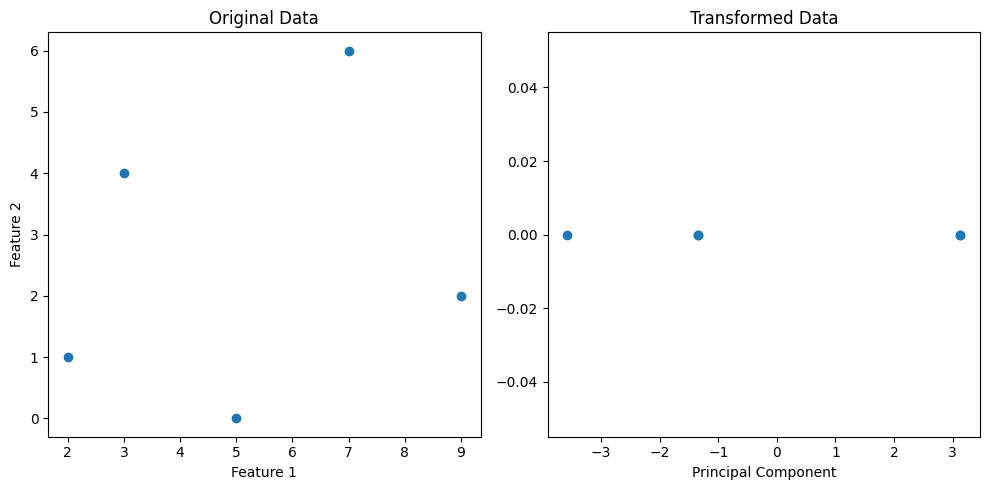

In [4]:
import numpy as np
import matplotlib.pyplot as plt


data_matrix = np.array([(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)])

mean = np.mean(data_matrix, axis=0)
normalized_data = data_matrix - mean


cov_matrix = np.cov(normalized_data, rowvar=False)


eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]

k = 1 
top_eigenvectors = eigenvectors[:, :k]

transformed_data = np.dot(normalized_data, top_eigenvectors)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_matrix[:, 0], data_matrix[:, 1])
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(transformed_data[:, 0], np.zeros_like(transformed_data))
plt.title('Transformed Data')
plt.xlabel('Principal Component')
plt.ylabel('')

plt.tight_layout()
plt.show()
